In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc9.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc10.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc1.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc2.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/208.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/212.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/215.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/202.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc2.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc45.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc50.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/211.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc44.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/carie

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [4]:
x = []
y = []

image_size = 224

labels = ['caries','without_caries']

for i in labels:
    
    folderPath = os.path.join('/kaggle/input/tooth-decay-datasetraw/teeth_dataset/Trianing',i)

    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        x.append(img)
        if(i=='caries'):
            y.append(1)
        else:
            y.append(0)
        
labels = ['caries','no-caries']
for i in labels:
    folderPath = os.path.join('/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        x.append(img)
        if(i=='caries'):
            y.append(1)
        else:
            y.append(0)

x = np.array(x)
y = np.array(y)

In [5]:
len(x)

288

In [6]:
x[0]

array([[[155, 100, 179],
        [153, 100, 175],
        [150,  99, 168],
        ...,
        [219, 180, 212],
        [200, 161, 194],
        [189, 149, 184]],

       [[155,  99, 180],
        [153,  99, 176],
        [150,  98, 169],
        ...,
        [209, 170, 203],
        [207, 167, 201],
        [205, 165, 201]],

       [[148,  94, 176],
        [149,  95, 174],
        [151,  99, 172],
        ...,
        [204, 165, 197],
        [213, 173, 206],
        [218, 179, 212]],

       ...,

       [[141, 156, 170],
        [143, 157, 170],
        [146, 159, 172],
        ...,
        [164, 170, 189],
        [164, 170, 189],
        [164, 170, 189]],

       [[133, 153, 169],
        [135, 154, 169],
        [138, 156, 170],
        ...,
        [168, 173, 192],
        [168, 174, 193],
        [169, 174, 193]],

       [[132, 155, 171],
        [134, 156, 172],
        [136, 157, 174],
        ...,
        [172, 176, 195],
        [172, 177, 196],
        [173, 177, 196]]

In [7]:
y[0]

1

In [8]:
x.shape

(288, 224, 224, 3)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85)

In [10]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

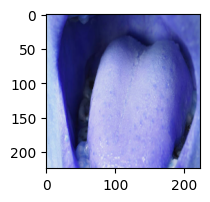

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,2))
plt.imshow(x_train[1])

In [12]:
classes = ['no-cavity','cavity']

In [13]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

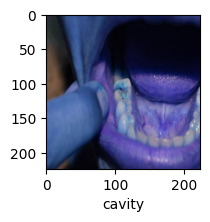

In [14]:
plot_sample(x_train,y_train,24)

In [15]:
y_train[24]

1

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-05-23 10:07:03.129897: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-23 10:07:03.130008: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-23 10:07:03.392969: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_ds= train_datagen.flow(
        x_train, y_train, batch_size=32,
)

validation_ds = validation_datagen.flow(
        x_test, y_test, batch_size=32,)

In [18]:
len(train_ds)

8

In [19]:
len(validation_ds)

2

In [35]:
import keras
import tensorflow as tf
from tensorflow.keras import layers,models
from keras.applications.mobilenet_v2 import MobileNetV2

In [36]:
mobile_net_v2 = MobileNetV2(
    input_shape=(224,224,3),
    alpha=1.0,
    include_top=False,
    weights="imagenet",
    classifier_activation="softmax",
)

model4 = models.Sequential([
    
    ## mobile_net_v2
    mobile_net_v2,
    
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(500, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model4.compile(optimizer= 'adam',
           loss='binary_crossentropy',
           metrics=['accuracy'])

In [37]:
history4 = model4.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
1/8 ━━━━━━━━━━━━━━━━━━━━ 5:32 47s/step - accuracy: 0.6250 - loss: 0.6720

W0000 00:00:1716459311.819240     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8124 - loss: 5.1530   

W0000 00:00:1716459329.327193     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716459332.510004     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


8/8 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.8164 - loss: 5.0081 - val_accuracy: 0.9545 - val_loss: 0.1068
Epoch 2/10


W0000 00:00:1716459334.139895     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.9275 - loss: 0.1131 - val_accuracy: 0.9545 - val_loss: 0.2644
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9497 - loss: 0.1422 - val_accuracy: 0.9545 - val_loss: 0.6363
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.9451 - loss: 0.0973 - val_accuracy: 0.9545 - val_loss: 1.0227
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9568 - loss: 0.1003 - val_accuracy: 0.9545 - val_loss: 1.3028
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.9721 - loss: 0.0663 - val_accuracy: 0.9545 - val_loss: 1.9515
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.9605 - loss: 0.0614 - val_accuracy: 0.9545 - val_loss: 2.2516
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.9718 - loss: 0.1357 - val_accuracy: 0.9545 - val_loss: 1.7445
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9779 - loss: 0.0470 - val_accuracy: 0.9545 - val_loss: 1.6404
Epo

In [38]:
model4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1000)           │    62,721,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,371,733 (749.10 MB)

 Trainable params: 65,445,873 (249.66 MB)

 Non-trainable params: 34,112 (133.25 KB)

 Optimizer params: 130,891,748 (499.31 MB)

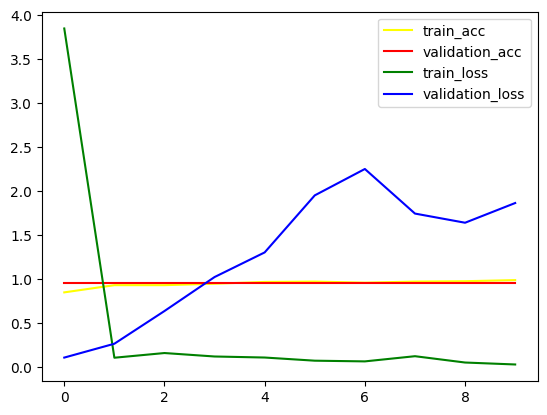

In [39]:
plt.plot(history4.history['accuracy'], color='yellow', label='train_acc')
plt.plot(history4.history['val_accuracy'], color='red', label='validation_acc')
plt.plot(history4.history['loss'], color='green', label='train_loss')
plt.plot(history4.history['val_loss'], color='blue', label='validation_loss')
plt.legend()

In [40]:
def convert_into_categorical(y):
    length=len(y)
    for i in range(length):
        y = y.astype(int)
    return y

In [41]:
y_pred_temp = model4.predict(x_test)
y_pred_temp

1/2 ━━━━━━━━━━━━━━━━━━━━ 2s 3s/step

W0000 00:00:1716459379.611823     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step


W0000 00:00:1716459382.477149     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [27]:
y_pred = model4.predict(x_test)
y_pred=convert_into_categorical(y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[ 0,  2],
       [ 0, 42]])

Text(70.72222222222221, 0.5, 'Actual')

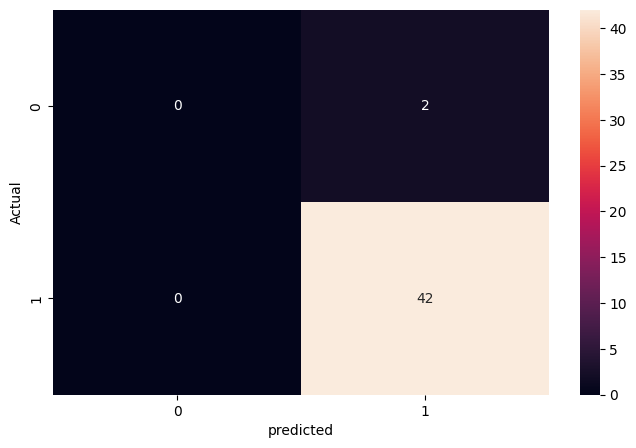

In [28]:
import seaborn as sb
plt.figure(figsize=(8,5))
sb.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Actual')

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.95      1.00      0.98        42

    accuracy                           0.95        44
   macro avg       0.48      0.50      0.49        44
weighted avg       0.91      0.95      0.93        44



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.metrics import roc_curve

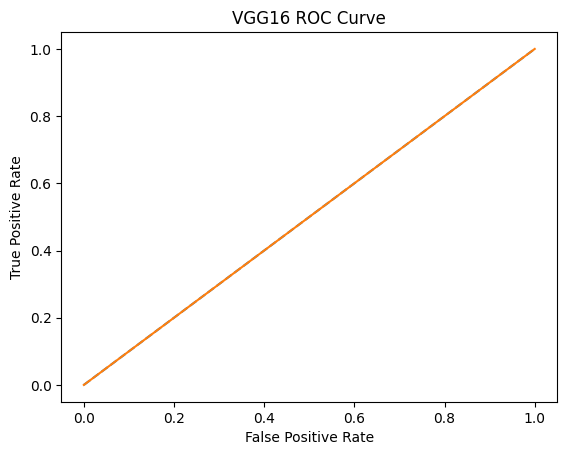

In [32]:
fpr, tpr, thresolds = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('VGG16 ROC Curve')
plt.show()

predicted: cavity


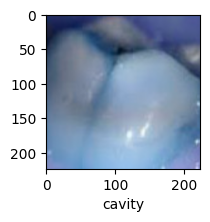

In [33]:
plot_sample(x_test, y_test, 1)
print("predicted:" ,classes[y_pred[1][0]])

In [34]:
model4.evaluate(x_test, y_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 3s 4s/step - accuracy: 0.9375 - loss: 11.3284

W0000 00:00:1716458993.538393     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9489 - loss: 9.2687


W0000 00:00:1716458995.509288     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[8.238858222961426, 0.9545454382896423]